In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
data=nc.Dataset('/ihesp/archive/Sunway_Runs/HR_HF_TNST/B.E.13.BTRANS.ne120_t12.sehires38.003.sunway.pop.h.HMXL.185001.210012.nc')
result = data.variables['HMXL'][:,:601,500:2000]

In [3]:
result.shape

(3012, 601, 1500)

In [4]:
result1 = result[1871,:,:]

In [16]:
(3011-1872+1)/12

95.0

In [6]:
        datau=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0021-01.UVEL.nc')
        plotvaru = datau.variables['UVEL'][0,1,:,500:2000]
        lontu = datau.variables['ULONG'][:,500:2000]
        lattu = datau.variables['ULAT'][:,500:2000]

In [7]:
    result1[result1 == -1] = np.nan
    result1[result1 == 0] = np.nan

In [8]:

nice_cmap=plt.get_cmap('jet')
#lev_cmap = nice_cmap([10,20,30,40,50,60,70,80,90,100,110,120,140,150,160,170,180,190,200,210,220,230,240,290,300])
lev_cmap = nice_cmap([300,290,240,230,220,210,200,190,180,170,160,150,140,120,110,100,90,80,70,60,50,40,30,20,10])
new_cmap = cols.ListedColormap(lev_cmap,"jet")
nice_levels = [-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75,3]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#nice_levels = [40,60,80,100,120,140,160,180,200]
nice_levels = [-220,-200,-180,-160,-140,-120,-100,-80,-60,-40]
#levels = [220,-60]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


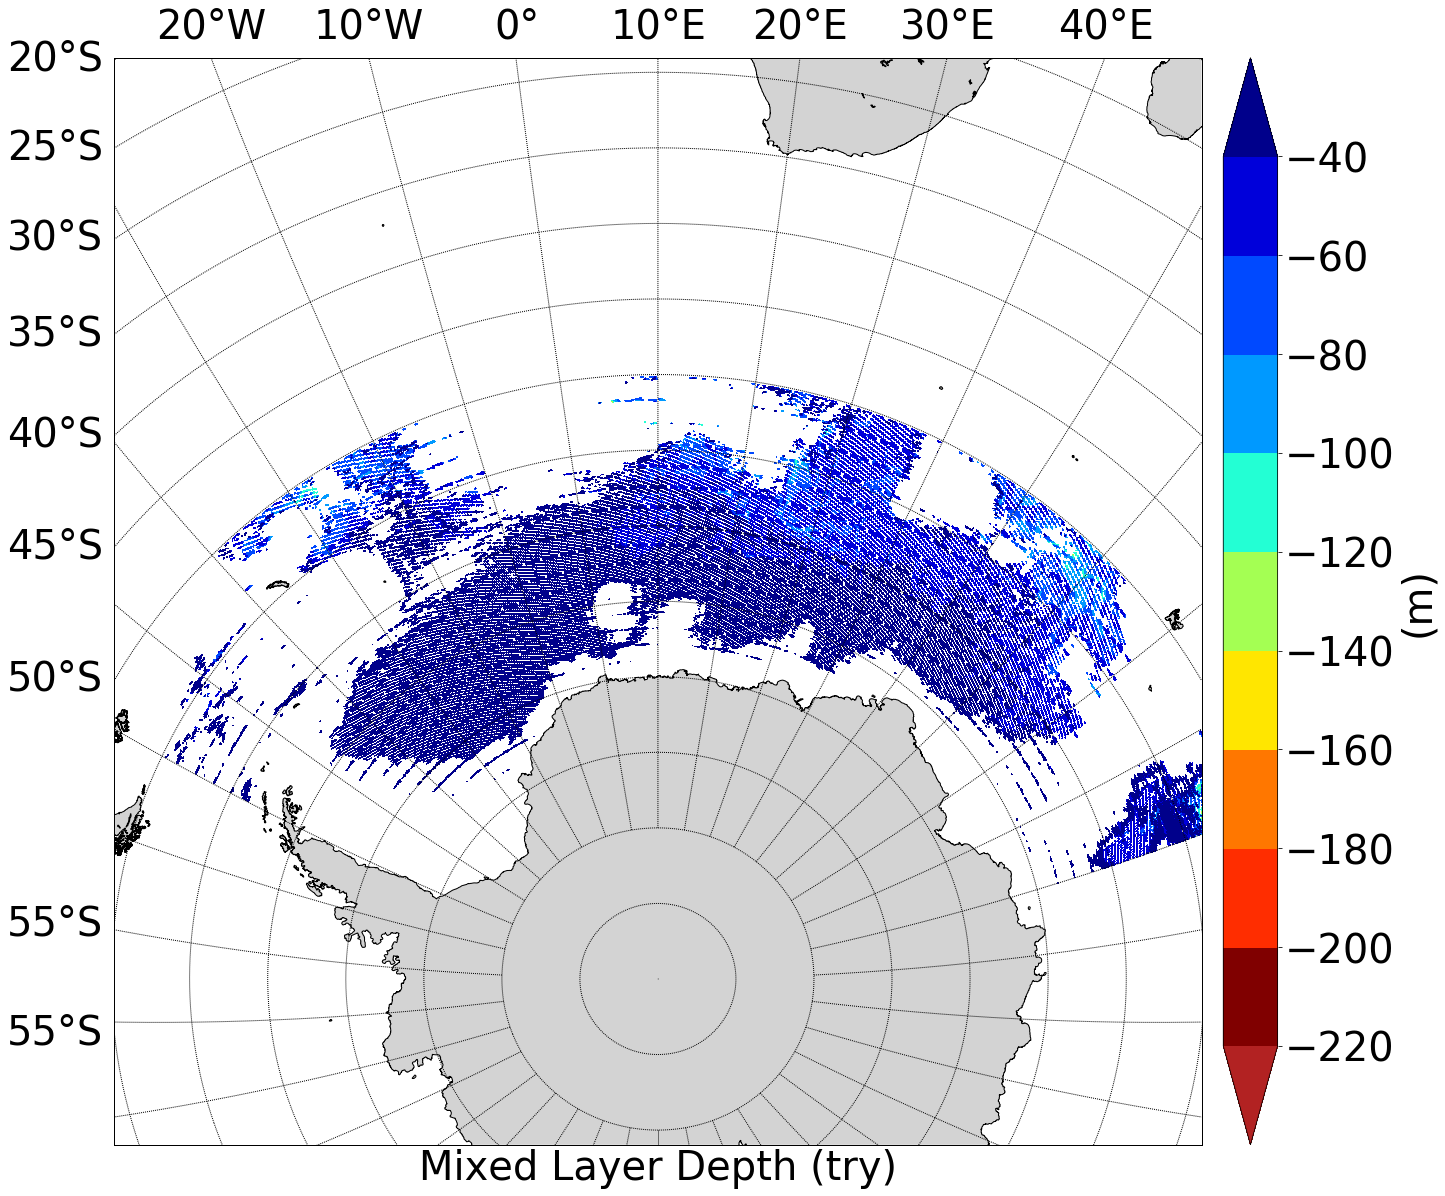

In [9]:

        plt.figure(figsize=(25,20))
        my_font = {'fontname':'Cambria', 'size':'40'}

        map = Basemap(projection='aeqd', lat_0 = -65, lon_0 = 10,area_thresh = 100,\
                     width = 8000000,height = 8000000,resolution ='h') 
        map.drawcoastlines()
        map.fillcontinents(color = 'lightgrey')
        map.drawmapboundary(color='black')
 
        map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
        map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)
       
        xq,yq=map(lontu,lattu)
        #x2,y2=map(lont2,latt2)
        #map.plot(x2,y2,'black',linewidth=8)
        CP = map.contourf(xq,yq,-result1/100,cmap = new_cmap,levels = nice_levels,extend='both')
        
        CP.cmap.set_under('firebrick')
        CP.cmap.set_over('darkblue')
        cbar =map.colorbar(CP,extend='both',extendfrac='auto',ticks= nice_levels)
      
        cbar.ax.tick_params(labelsize=40) 
        cbar.set_label('(m)', **my_font)
        plt.xlabel('Mixed Layer Depth (try)',**my_font)
        plt.savefig("mix",bbox_inches='tight')
        

In [10]:
result

masked_array(
  data=[[[-1.0, -1.0, -1.0, ..., -1.0, -1.0, -1.0],
         [-1.0, -1.0, -1.0, ..., -1.0, -1.0, -1.0],
         [-1.0, -1.0, -1.0, ..., -1.0, -1.0, -1.0],
         ...,
         [0.0, 0.0, 0.0, ..., 0.0, 5651.833984375, 5599.70361328125],
         [0.0, 0.0, 0.0, ..., 5414.91552734375, 0.0, 0.0],
         [0.0, 0.0, 0.0, ..., 5398.86328125, 5306.13623046875, 0.0]],

        [[-1.0, -1.0, -1.0, ..., -1.0, -1.0, -1.0],
         [-1.0, -1.0, -1.0, ..., -1.0, -1.0, -1.0],
         [-1.0, -1.0, -1.0, ..., -1.0, -1.0, -1.0],
         ...,
         [0.0, 0.0, 0.0, ..., 0.0, 8818.6796875, 8665.7490234375],
         [0.0, 0.0, 0.0, ..., 8936.005859375, 0.0, 0.0],
         [0.0, 0.0, 0.0, ..., 8938.15625, 8795.5458984375, 0.0]],

        [[-1.0, -1.0, -1.0, ..., -1.0, -1.0, -1.0],
         [-1.0, -1.0, -1.0, ..., -1.0, -1.0, -1.0],
         [-1.0, -1.0, -1.0, ..., -1.0, -1.0, -1.0],
         ...,
         [0.0, 0.0, 0.0, ..., 0.0, 8069.26513671875, 8401.30859375],
         [0.0, 0